<center><h1> Tarea 1 - Machine Learning </h1></center>
<center><h3> Matías Ramírez Marianetti | Javier Rodríguez Aguilera</h3></center>
<center><h3> 201173506-4 | 201173553-6 </h3></center>
<center><h3> matias.ramirezm@alumnos.usm.cl | javier.rodriguez@alumnos.usm.cl </h3></center>

# Pregunta 1: Regresión Lineal Ordinaria (LSS)

Se utilizará un pequeño dataset de nombre prostate-cancer el cual es usado con frecuencia para realizar pruebas priliminares de con métodos de regresión. Estos datos consisten en la eventual correlación entre el nivel de antígeno prostático específico medido de un paciente, y otra serie de otras mediciones clínicas obtenidas después de practicar al paciente una prostatectonía radical.

##  Parte A: Cargar los Datos

In [1]:
import pandas as pd
import numpy as np
url = 'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data'
df = pd.read_csv(url, sep='\t', header=0)
df = df.drop('Unnamed: 0', axis=1)
istrain_str = df['train']
istrain = np.asarray([True if s == 'T' else False for s in istrain_str])
istest = np.logical_not(istrain)
df = df.drop('train', axis=1)

Para comenzar entre las lineas cinco(5) y nueve(9) de este algoritmo se elimina la columna que contiene el número de cada registro del dataset, de esta forma no se tendrá una variable innecesaria. Luego se toma la columna 'train' y a través de esta se generan dos arreglos, istrain e istest. En la línea de istrain se recorre la columna 'train' contenida en la variable istrain_str y se le coloca True a los datos en que 'train' sea 'T' y False en el caso contrario, de esta forma para el caso de istest se toma istrain y se invierten los valores booleanos de este. Finalmente se elimina la columna 'train', ya que sus valores serán utilizados a través de los arreglos anteriormente señalados.

##  Parte B: Descripción de los Datos

In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
lcavol     97 non-null float64
lweight    97 non-null float64
age        97 non-null int64
lbph       97 non-null float64
svi        97 non-null int64
lcp        97 non-null float64
gleason    97 non-null int64
pgg45      97 non-null int64
lpsa       97 non-null float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


La tabla anterior muestra la naturaleza y disribución de los datos.

En total son 97 registros de los cuales 67 corresponden a datos de entrenamiento del modelo y 30 son para probar el modelo. las columnas del 1 al 8 son predictores, y la última corresponde a la etiqueta de cada registro.

5 de las variables son de tipo float, mientras que los otros 4 son de tipo entero. Además, a juzgar por las medias se puede deirque los datos no están normalizados.

##  Parte C: Normalización de los Datos

La tabla anterior muestra que los datos tienen rango de valores distintos entre cada variable, la naturaleza y distibución de cada columna es diferente del resto.

Lo anterior muchas veces ocaciona creaciones de modelos incorectos. Por lo tanto, resulta necesario normalizar los datos para arreglar las varianzas y de esta forma dejar los datos respecto a un mismo punto.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['lpsa'] = df['lpsa']

##  Parte D: Creación del Modelo

In [4]:
import sklearn.linear_model as lm
X = df_scaled.ix[:,:-1]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['lpsa']
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)
print

Lo importante del tercer paso, es agregar una nueva columna que contiene solamente unos(1), los cuales denotan a $x^{(0)}$ y de esta forma definir un modelo lineal con una intersección en forma matricial.

El parametro especificado en la función que inicializa el modelo de regresión lineal es <i>fit_intercept</i>, indica si se calcula o no el intercepto para el modelo. En este caso no es necesario.

## Parte E: Pesos y Z-score de Predictores

In [5]:
Beta_j = linreg.coef_

N = Xtrain.shape[0]
p = Xtrain.shape[1]

sigma = ( 1.0/(N-p-1) ) * np.sum( np.power(ytrain - linreg.predict(Xtrain), 2) )

v_j = np.diag(np.linalg.inv( np.dot(Xtrain.transpose(), Xtrain) ))

Z_score_j = Beta_j / np.sqrt( sigma * v_j )

print X.columns.values
print np.round(Beta_j, 3)
print np.round(Z_score_j, 3)

['lcavol' 'lweight' 'age' 'lbph' 'svi' 'lcp' 'gleason' 'pgg45' 'intercept']
[ 0.676  0.262 -0.141  0.209  0.304 -0.287 -0.021  0.266  2.465]
[  5.32    2.727  -1.384   2.038   2.448  -1.851  -0.145   1.723  27.359]


La salida del código anterior muestra los pesos en la primera fila y los valores de Z-score en la segunda fila, en el orden respectivo conforme a las cabeceras del set de datos.

Para un nivel de significancia de un $5\%$, las variables sin suficiente evidencia que demuestre una relación con la respuesta son aquellas con un z-score fuera del rango entre $-2$ y $2$. Es decir las variables <i>lcavol</i>, <i>lweight</i>, <i>lbph</i> y <i>svi</i>.

## Parte F: Estimación del Error del Modelo

In [6]:
from sklearn import cross_validation

def mse_cross_validation(x, y, K):
    k_fold = cross_validation.KFold(len(x),K)
    mse_cv = 0
    for k, (train, val) in enumerate(k_fold):
        linreg = lm.LinearRegression(fit_intercept = False)
        linreg.fit(x[train], y[train])
        yhat_val = linreg.predict(x[val])
        mse_fold = np.mean(np.power(yhat_val - y[val], 2))
        mse_cv += mse_fold
        
    mse_cv = mse_cv / K
    
    return mse_cv

yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

K=5
mse_train_5 = mse_cross_validation(Xm, ym, K)

K=10
mse_train_10 = mse_cross_validation(Xm, ym, K)

print "Error de prueba:"
print "mse:", np.round(mse_test, 4)
print
print "Error de entrenmiento, fold k = 5:"
print "mse:",np.round(mse_train_5, 4)
print
print "Error de entrenamiento, fold k = 10:"
print "mse:", np.round(mse_train_10, 4)

Error de prueba:
mse: 0.5213

Error de entrenmiento, fold k = 5:
mse: 0.9565

Error de entrenamiento, fold k = 10:
mse: 0.7572


A partir de los resultados obtenidos es posible obtener dos observaciones relevantes. En primer lugar medida que se van aumentando los folds el error irá disminuyendo debido a que la cantidad de valores de entrenamiento aumenta por lo que el modelo tiene un mayor volumen de datos para ajustarse correctamente.

En segundo lugar, los errores de entrenamiento son mayores al error de prueba del modelo, esto se debe a que existe un sobreajuste del modelo sobre los datos de entrenamiento.

Podría resultar conveniente remover las variables que no tienen significancia en la respuesta del modelo y así veificar si se disminuye el sobreajuste.

## Parte G: Hipótesis de Normalidad

Se procede a generar un gráfico Q-Q para corroborar la hipótesis de normlidd de los errores del modelo.

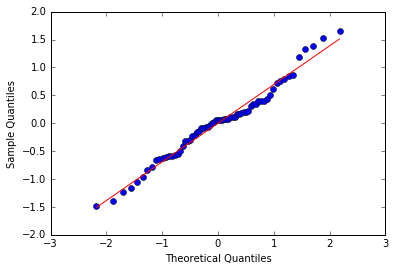

In [7]:
%matplotlib inline

import statsmodels.api as sm
import pylab

yhat_train = linreg.predict(Xtrain)
mse_train = yhat_train - ytrain

sm.qqplot(mse_train, line='r')

pylab.show()

Los errores de entrenamiento del modelo siguen una tendencia lineal como se muestra en el gráfico anterior. Esto muestra que es razonable la hipótesis de normalidad sobre los residuos.

# Pregunta 2: Selección de Atributos

## Parte A: Forward Step-wise Selection

In [8]:
def fss(x_tst, y_tst, x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    
    mses_train = []
    mses_test = []
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            x_test = x_tst[:,indexes]
            
            mse_train_cv = mse_cross_validation(x_train, y, 15)
            
            z_score_candidate = abs(Z_score_j.tolist()[candidate])
            
            model.fit(x_train, y)
            
            predictions_train = model.predict(x_train)
            residuals_train = predictions_train - y
            mse_train_candidate = np.mean(np.power(residuals_train, 2))
            
            predictions_test = model.predict(x_test)
            residuals_test = predictions_test - y_tst
            mse_test_candidate = np.mean(np.power(residuals_test, 2))
            
            # cambiar por: mse_train_candidate, mse_train_cv, z_score_candidate
            current_score = mse_train_cv
            
            score_candidates.append((current_score, mse_train_candidate, mse_test_candidate, candidate))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate_mse_train, best_candidate_mse_test, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "totalvars = %d"%(len(indexes)-1)
        print "selected = %s | mse train = %f | mse test = %f"%(names_x[best_candidate], best_candidate_mse_train, best_candidate_mse_test)
        print
        
        mses_train.append(best_candidate_mse_train)
        mses_test.append(best_candidate_mse_test)
        
    return mses_train, mses_test

El criterio utilizado en el código de ejemplo es elegir la variable que genere el menor error de entrenamiento calculado mediante error cuadrático. En el código anterior se implemenan dos criterios distintos con el fin de elegir el que entrege mejores resultados.

El primer criterio es similar al utilizado en el ejemplo, con la diferencia que el error de entrenamiento es calculado mediante cross-validation. El segundo criterio elige la variable con el menor z-score.

Los mejores resultados son entregados utilizando el primer criterio, con cross-validation, ya que presenta menores errores de prueba y de entrenamiento.

totalvars = 1
selected = Lcavol | mse train = 0.664606 | mse test = 0.479739

totalvars = 2
selected = Lweight | mse train = 0.553610 | mse test = 0.492482

totalvars = 3
selected = Pgg45 | mse train = 0.528866 | mse test = 0.492593

totalvars = 4
selected = Lcp | mse train = 0.518607 | mse test = 0.569762

totalvars = 5
selected = Age | mse train = 0.506216 | mse test = 0.551618

totalvars = 6
selected = Svi | mse train = 0.471234 | mse test = 0.488041

totalvars = 7
selected = Lbph | mse train = 0.439363 | mse test = 0.516513

totalvars = 8
selected = Gleason | mse train = 0.439200 | mse test = 0.521274



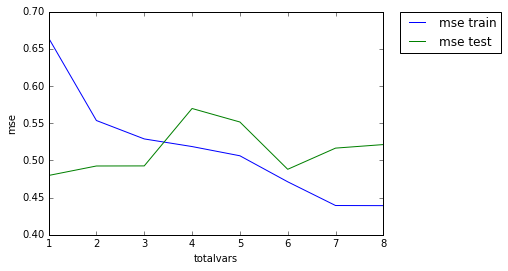

In [9]:
import matplotlib.pyplot as plt

names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
mses_train, mses_test = fss(Xtest.as_matrix(),ytest.as_matrix(),Xm,ym,names_regressors)

plt.plot(range(1,9), mses_train, label="mse train")
plt.plot(range(1,9), mses_test, label="mse test")
plt.ylabel('mse')
plt.xlabel('totalvars')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Se puede observar del gráfico obtenido que el error de entrenamiento disminuye conforme se agregan nuevas variables, esto se debe a que el modelo se va sobreajustando cada ves más, ya que el error es calculado con los mismos datos con que se creó el modelo.

Sin embargo, al probar el modelo con los datos de prueba no ocurre el mismo fenómeno. este oscila el valor del error al variar la cantidad de variables consideradas.

Cada vez que la curva de entrenamiento esta muy por debajo de la curva de prueba, se trata de un sobreajuste del modelo. Esto ocurre con 4, 5 y 7 y 8 variables. Por otro lado, con 6 variables las curvas están cercanas, por lo que no se considera sobreajuste.

A partir del gráfico, y tomando en consideración lo anterior, es posible determinar la cantidad de variables óptimas que se deben considerar al momento de crear el modelo. Es importante descartar los casos donde exista sobreajuste del modelo, y los casos donde el error de entrenamiento sea muy alto. Los más conveniente es elegir una buena convinación entre ambos errores. Así, la más conveniente cantidad de variables a considerar es de 6, donde el error de prueba es menor entre las opciones factibles.

## Parte B: Backward Step-wise Selection

In [10]:
def bss(x_tst, y_tst, x, y, names_x, k = 10000):
    p = x.shape[1]
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = []
    current_score = 0.0
    best_new_score = 0.0
    
    first_model = lm.LinearRegression(fit_intercept=False)
    first_model.fit(x, y)
    
    mse_train = np.mean(np.power(first_model.predict(x) - y, 2))
    mse_test = np.mean(np.power(first_model.predict(x_tst) - y_tst, 2))
    
    print "totalvars = %d"%(p-1)
    print "removed = none | mse train = %f | mse test = %f"%(mse_train, mse_test)
    print
    
    mses_train = [mse_train]
    mses_test = [mse_test]
    while len(remaining)>2 :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = remaining[:]
            indexes.remove(candidate)
            x_train = x[:,indexes]
            x_test = x_tst[:,indexes]
            
            model.fit(x_train, y)
            
            predictions_train = model.predict(x_train)
            residuals_train = predictions_train - y
            mse_train_candidate = np.mean(np.power(residuals_train, 2))
            
            predictions_test = model.predict(x_test)
            residuals_test = predictions_test - y_tst
            mse_test_candidate = np.mean(np.power(residuals_test, 2))
            
            current_score = mse_train_candidate
            
            score_candidates.append((current_score, mse_train_candidate, mse_test_candidate, candidate))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate_mse_train, best_candidate_mse_test, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "totalvars = %d"%(len(indexes)-1)
        print "removed = %s | mse train = %f | mse test = %f"%(names_x[best_candidate], best_candidate_mse_train, best_candidate_mse_test)
        print
        
        mses_train.append(best_candidate_mse_train)
        mses_test.append(best_candidate_mse_test)

    return mses_train, mses_test

Se desea realizar análisis similar al anterior, donde esta vez se irá eliminando variables del modelo una por una para determianr un escenario óptimo.

totalvars = 8
removed = none | mse train = 0.439200 | mse test = 0.521274

totalvars = 7
removed = Gleason | mse train = 0.439363 | mse test = 0.516513

totalvars = 6
removed = Age | mse train = 0.455818 | mse test = 0.548593

totalvars = 5
removed = Lcp | mse train = 0.478648 | mse test = 0.485924

totalvars = 4
removed = Pgg45 | mse train = 0.489776 | mse test = 0.456332

totalvars = 3
removed = Lbph | mse train = 0.521011 | mse test = 0.400531

totalvars = 2
removed = Svi | mse train = 0.553610 | mse test = 0.492482

totalvars = 1
removed = Lweight | mse train = 0.664606 | mse test = 0.479739



C:\Users\Javier\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


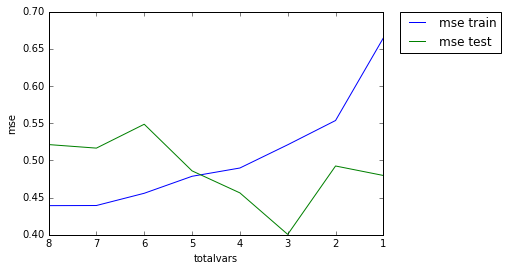

In [11]:
import matplotlib.pyplot as plt

mses_train, mses_test = bss(Xtest.as_matrix(),ytest.as_matrix(),Xm,ym,names_regressors)

eje_x = range(1,9)[::-1]

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(mses_train, label="mse train")
ax.plot(mses_test, label="mse test")
plt.ylabel('mse')
plt.xlabel('totalvars')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.set_xticklabels(eje_x)

ax.set_xticklabels(eje_x)

fig.show()



El error de entrenamiento va aumentando a medida que dismiuye la cantidad de variables para entrenar el modelo, esto ya que entre más variables ocupa el modelo, mejor será la predicción para los mismos registros con los que se entrenó, debido al sobre ajuste que se genera.

Por otra parte, la curva de error para los datos de prueba oscilan  medida que se varía la cantidad de variables. Es claro a partir del gráfico que la mejor opción es con 3 variables, <i>Lcavol</i>, <i>Lweight</i> y <i>Svi</i>. Esto debido a que unicamente con estas variables en el modelo, el error de prueba es menor.

# Pregunta 3: Regularización

## Parte A: Ridge Regression

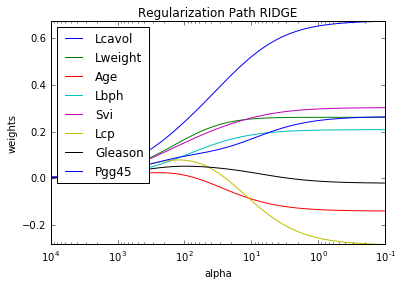

In [12]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt

#X = X.drop('intercept', axis=1)
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
    
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print alphas_.shape
    #print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)
    
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
print
plt.show()

Ridge Regression penalizará sus coeficientes, de tal manera que los que son menos eficientes en la estimación disminuirán de forma más rápida. Es una penalización equivalente al cuadrado del valor de los coeficientes. El valor de alpha determina que tanto se penalizarán lo coeficientes del modelo. Cuanto mayor es el valor de alpha más cercano a 0 serán los coeficientes, y mientras menor sea, más se parecerá al modelo de regresión anterior donde los coeficientes se verán menos afectados por la penalización.

En el gráfico se puede apreciar como el valor de alpha (de mayor a menor) varía los coeficientes de las variables, donde se ve lo antes explicado.

Si uno quisiese escojer el mejor alpha se debería consultar a un gráfico MSE vs alpha, aunque se podría decir que mientras más rápido se achique un coeficiente, menos importante es en la predicción.

## Parte B: Lasso Regression

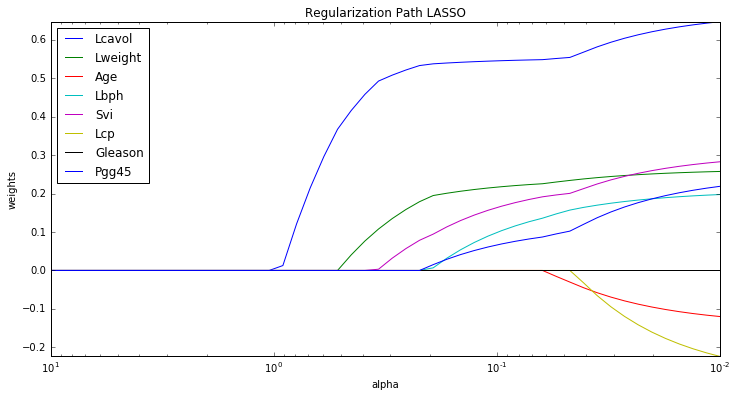

In [13]:
from sklearn.linear_model import Lasso

#X = X.drop('intercept', axis=1)
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(1,-2,base=10)
coefs = []
clf = Lasso(fit_intercept=True)
for a in alphas_:
    clf.set_params(alpha=a)
    clf.fit(Xtrain, ytrain)
    coefs.append(clf.coef_)
    
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print alphas_.shape
    #print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)

plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

Éste método de regularización es similar a Ridge pero utiliza una penalización equivalente al valor absoluto de los coeficientes, y además incorpora en su algoritmo una selección de atributos en conjunto con la regularización. Esto lo hace llevando a cero los coeficientes con poca implicancia en el modelo en lugar de solo disminuir su valor.

Al igual que Ridge se tiene un coeficiente alpha que determina el nivel de penalización a las variables. Mientras mayor sea el valor de alpha es más posible que los coeficientes tomen valores nulos, y mientras menor sea el valor de alpha, más cercano a una regresión normal será el modelo.

Del gráfico es posible notar que con valores de alpha entre 1 y 10 no se selecciona ninguna variable en el modelo, y a medida que decrece su valor se van "activando" las variables en la medida que signifiquen una mayor relevancia para el modelo.

Notar que la variable <i>Gleason</i> no se activa incluso para un valor muy pequeño de alpha, lo que indica su casi nula relevancia con el modelo.

## Parte C: Ridge - Error en Función de Alpha

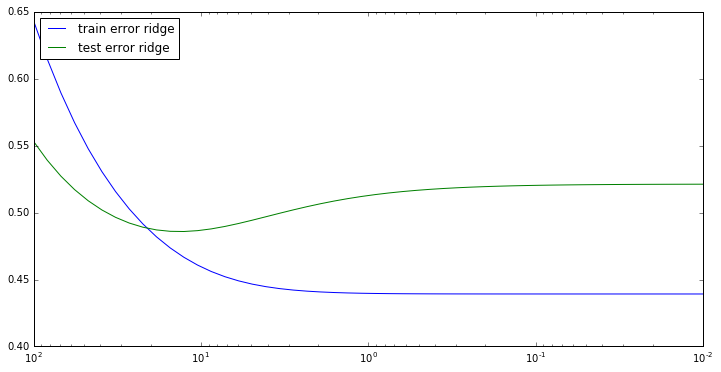

In [14]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

A partir del punto de intersección de las curvas del gráfico hacia adelante (alpha más pequeño), se puede apreciar un sobre ajuste del modelo ya que el error de entrenamiento es menor que el de prueba.

Además, cercano a un alpha igual a 10 el error de prueba encuentra su mínimo por lo que se podría decir que es con este valor que los coeficienes toman valores óptimos para el modelo en el caso de utilizar este método de regularización.

## Parte D: Lasso - Error en Función de Alpha

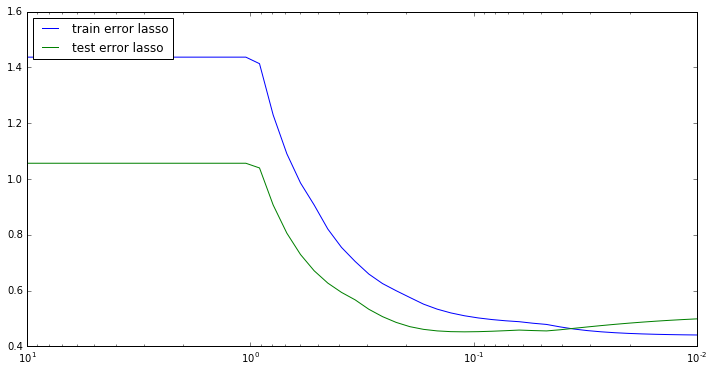

In [15]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(-2,1,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Del gráfico es posible notar que este método es más brusco que el anterior.

Hasta un alpha igual a 1 no hay cambios en el error, esto tiene relación con el gráfico anterior para este método donde no de considera ninguna variable en el modelo. A partir de este punto en adelante a medida que se van "activando" las variables y se les van asignando un valor a sus coeficientes el error disminuye considerablemente hasta llegar a un mínimo dejando fuera a 3 variables <i>Gleason</i>, <i>Age</i> y <i>Lcp</i>. Es en este punto donde el método tiene su valor óptimo de alpha.

A partir del punto de intersección entre las dos curvas, se produce un sobre ajuste del modelo ya que el error de entrenamiento es menor al de prueba.